<a href="https://colab.research.google.com/github/FrozenFalcon-Byte/Early-Stopping/blob/main/EarlyStopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split


In [3]:
X, y = make_circles(n_samples = 100, noise = 0.1, random_state = 42)

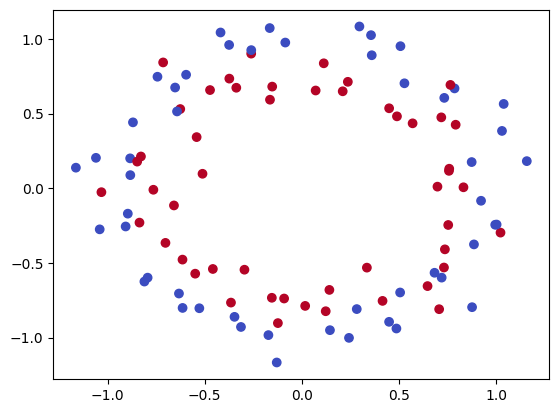

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')

In [5]:
model = Sequential()

In [6]:
model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
history = model.fit(X_train, y_train, epochs = 3700, validation_data=(X_test, y_test))

Streaming output truncated to the last 5000 lines.
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8305 - loss: 0.3472 - val_accuracy: 0.7000 - val_loss: 0.4858
Epoch 1202/3700
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8109 - loss: 0.3616 - val_accuracy: 0.7000 - val_loss: 0.4887
Epoch 1203/3700
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8188 - loss: 0.3566 - val_accuracy: 0.7000 - val_loss: 0.4875
Epoch 1204/3700
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8422 - loss: 0.3391 - val_accuracy: 0.7000 - val_loss: 0.4867
Epoch 1205/3700
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8266 - loss: 0.3546 - val_accuracy: 0.7000 - val_loss: 0.4897
Epoch 1206/3700
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8109 - loss: 0.3648 - val_accuracy: 0.7000 - val_loss: 0.4855
Epoch 1207/3700
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8305 - loss: 0.3406 - val_accuracy: 0.7500 - val_loss: 0.4863
Epoch 1208/3700
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step -

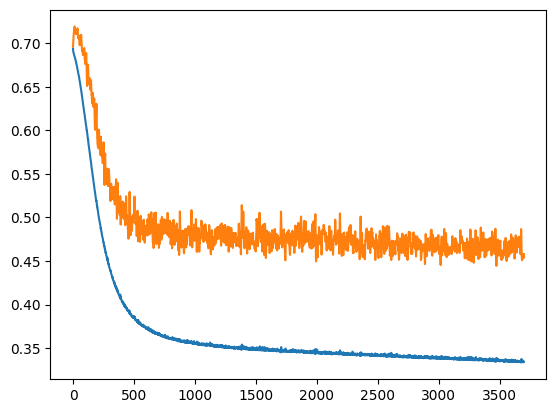

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [28]:
# Early Stopping
model = Sequential()

In [29]:
model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [30]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [31]:
callback = EarlyStopping(
    monitor = 'val_loss',
    min_delta = 0.00001,
    patience = 50,
    verbose = 1,
    mode = 'auto',
    baseline = None,
    restore_best_weights= False
)

In [33]:
history = model.fit(X_train, y_train, epochs = 3700, validation_data=(X_test, y_test), callbacks=[callback])

Epoch 1/3700
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.7352 - loss: 0.6617 - val_accuracy: 0.5000 - val_loss: 0.7095
Epoch 2/3700
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6922 - loss: 0.6664 - val_accuracy: 0.4500 - val_loss: 0.7084
Epoch 3/3700
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7234 - loss: 0.6648 - val_accuracy: 0.4000 - val_loss: 0.7097
Epoch 4/3700
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6875 - loss: 0.6623 - val_accuracy: 0.4000 - val_loss: 0.7097
Epoch 5/3700
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6383 - loss: 0.6687 - val_accuracy: 0.4000 - val_loss: 0.7093
Epoch 6/3700
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6891 - loss: 0.6614 - val_accuracy: 0.4500 - val_loss: 0.7097
Epoch 7/3700
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7102 - loss: 0.6532 - val_accuracy: 0.4500 - val_loss: 0.7101
Epoch 8/3700
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7047 - loss: 0.6596 - val_accuracy: 0.4500 - 

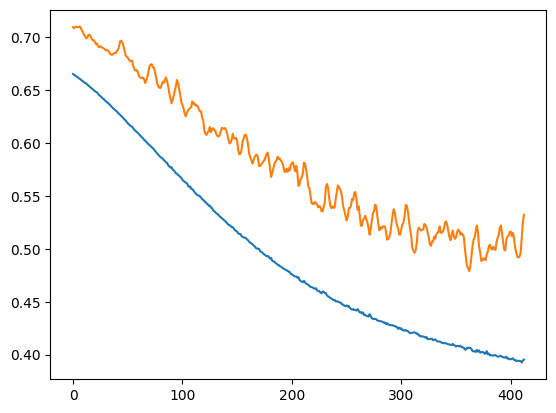

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])